<a href="https://colab.research.google.com/github/imazerty/1project/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
import random, cv2, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import keras










!unzip "data.zip"

class image_clustering:

	def __init__(self, folder_path="data", n_clusters=10, max_examples=None, use_imagenets=False, use_pca=False):
		paths = os.listdir(folder_path)
		if max_examples == None:
			self.max_examples = len(paths)
		else:
			if max_examples > len(paths):
				self.max_examples = len(paths)
			else:
				self.max_examples = max_examples
		self.n_clusters = n_clusters
		self.folder_path = folder_path
		random.shuffle(paths)
		self.image_paths = paths[:self.max_examples]
		self.use_imagenets = use_imagenets
		self.use_pca = use_pca
		del paths 
		try:
			shutil.rmtree("output")
		except FileExistsError:
			pass
		print("\n output folders created.")
		#os.makedirs("output")
		for i in range(self.n_clusters):
			os.makedirs("/content/output/cluster" + str(i))
		print("\n Object of class \"image_clustering\" has been initialized.")

	def load_images(self):
		self.images = []
		for image in self.image_paths:
			self.images.append(cv2.cvtColor(cv2.resize(cv2.imread(self.folder_path + "/" + image), (224,224)), cv2.COLOR_BGR2RGB))
		self.images = np.float32(self.images).reshape(len(self.images), -1)
		self.images /= 255
		print("\n " + str(self.max_examples) + " images from the \"" + self.folder_path + "\" folder have been loaded in a random order.")

	def get_new_imagevectors(self):
		if self.use_imagenets == False:
			self.images_new = self.images
		else:
			if use_imagenets.lower() == "vgg16":
				model1 = keras.applications.vgg19.vgg19(include_top=False, weights="imagenet", input_shape=(224,224,3))
			elif use_imagenets.lower() == "vgg19":
				model1 = keras.applications.vgg19.vgg19(include_top=False, weights="imagenet", input_shape=(224,224,3))
			elif use_imagenets.lower() == "resnet50":
				model1 = keras.applications.resnet50.ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))
			elif use_imagenets.lower() == "xception":
				model1 = keras.applications.xception.Xception(include_top=False, weights='imagenet',input_shape=(224,224,3))
			elif use_imagenets.lower() == "inceptionv3":
				keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(224,224,3))
			elif use_imagenets.lower() == "inceptionresnetv2":
				model1 = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
			elif use_imagenets.lower() == "densenet":
				model1 = keras.applications.densenet.DenseNet201(include_top=False, weights='imagenet', input_shape=(224,224,3))
			elif use_imagenets.lower() == "mobilenetv2":
				model1 = keras.applications.mobilenetv2.MobileNetV2(input_shape=(224,224,3), alpha=1.0, depth_multiplier=1, include_top=False, weights='imagenet', pooling=None)
			else:
				print("\n\n Please use one of the following keras applications only [ \"vgg16\", \"vgg19\", \"resnet50\", \"xception\", \"inceptionv3\", \"inceptionresnetv2\", \"densenet\", \"mobilenetv2\" ] or False")
				sys.exit()

			pred = model1.predict(self.images)
			images_temp = pred.reshape(self.images.shape[0], -1)
			if self.use_pca == False: 
				self.images_new = images_temp
			else: 
				model2 = PCA(n_components=None, random_state=728)
				model2.fit(images_temp)
				self.images_new = model2

	def clustering(self):
		model = KMeans(n_clusters=self.n_clusters, n_jobs=-1, random_state=728)
		model.fit(self.images_new)
		predictions = model.predict(self.images_new)
		#print(predictions)
		for i in range(self.max_examples):
			shutil.copy2(self.folder_path+"/"+self.image_paths[i], "/content/output/cluster"+str(predictions[i]))
		print("\n Clustering complete! \n\n Clusters and the respective images are stored in the \"output\" folder.")

if __name__ == "__main__":

	print("\n\n \t\t START\n\n")

	number_of_clusters = 10 # cluster names will be 0 to number_of_clusters-1

	data_path = "data" # path of the folder that contains the images to be considered for the clustering (The folder must contain only image files)

	max_examples = 500 # number of examples to use, if "None" all of the images will be taken into consideration for the clustering
	# If the value is greater than the number of images present  in the "data_path" folder, it will use all the images and change the value of this variable to the number of images available in the "data_path" folder. 

	use_imagenets = False
	# choose from: "Xception", "VGG16", "VGG19", "ResNet50", "InceptionV3", "InceptionResNetV2", "DenseNet", "MobileNetV2" and "False" -> Default is: False
	# you have to use the correct spelling! (case of the letters are irrelevant as the lower() function has been used)

	if use_imagenets == False:
		use_pca = False
	else:
		use_pca = False # Make it True if you want to use PCA for dimentionaity reduction -> Default is: False

	temp = image_clustering(data_path, number_of_clusters, max_examples, use_imagenets, use_pca)
	temp.load_images()
	temp.get_new_imagevectors()
	temp.clustering()

	print("\n\n\t\t END\n\n")

Archive:  data.zip
replace data/0 (2).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


 		 START



 output folders created.

 Object of class "image_clustering" has been initialized.

 500 images from the "data" folder have been loaded in a random order.

 Clustering complete! 

 Clusters and the respective images are stored in the "output" folder.


		 END




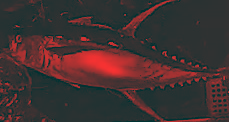

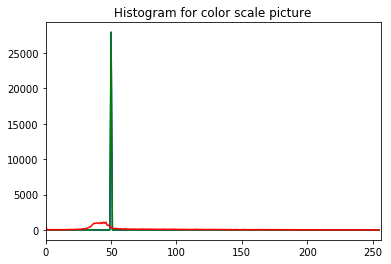

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/output/cluster1/out0img_02179.jpeg')
img[:, :, 1] = 50
img[:, :, 0] = 50
cv2_imshow(img)

color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

while True:
    k = cv2.waitKey(0) & 0xFF     
    if k == 27: break             # ESC key to exit 
cv2.destroyAllWindows()